In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
import graphviz
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,
                                                    test_size=0.2,random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
export_graphviz(dt_clf, out_file="tree.dot",class_names = iris.target_names,
                feature_names = iris.feature_names,
                impurity=True, filled=True)

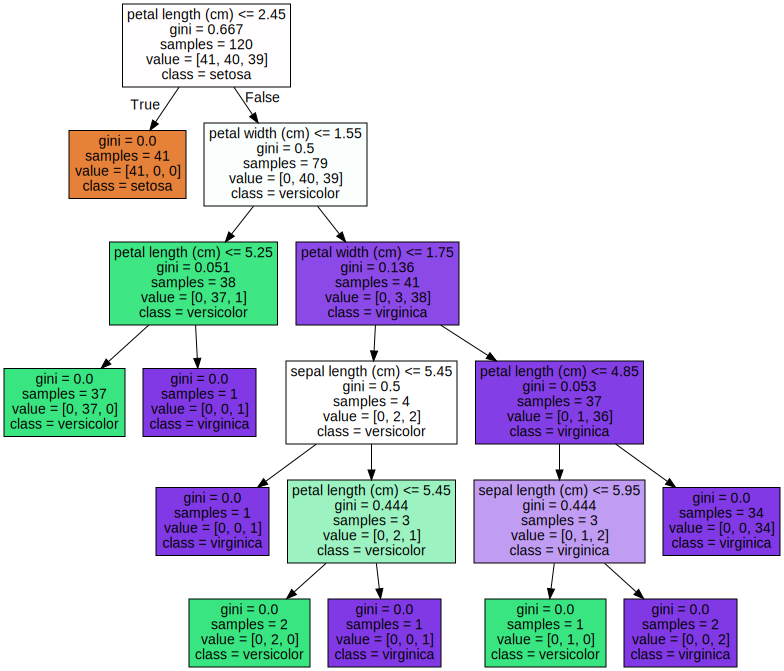

In [ ]:
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

feature importances :
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

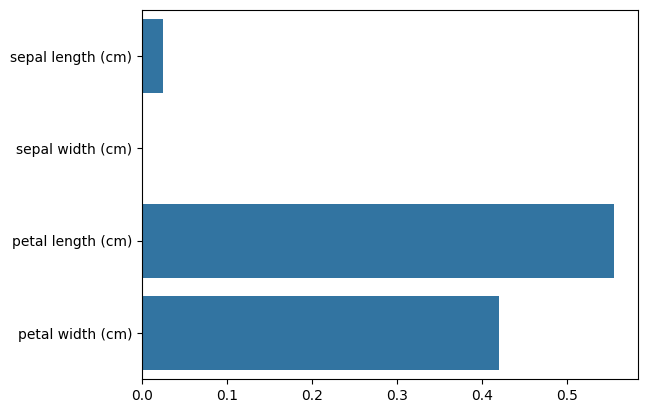

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("feature importances :\n{0}".format(np.round(dt_clf.feature_importances_,3)))

for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
 print('{0} :{1: .3f}'.format(name, value))

sns.barplot(x= dt_clf.feature_importances_,y= iris.feature_names)


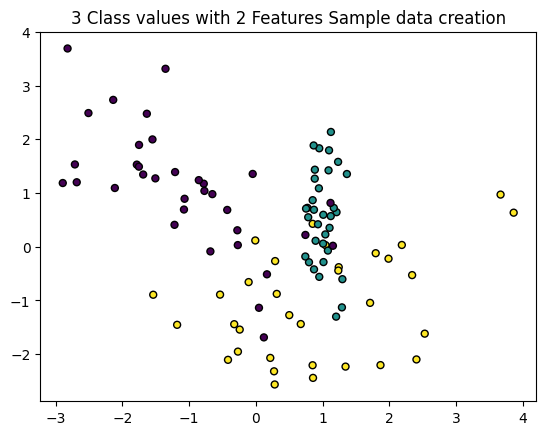

In [ ]:
# 틀 만들기
plt.title("3 Class values with 2 Features Sample data creation")

# make_classification > Sample generators : Generate a random n-class classification problem.
# 2차원 시각화를 위해 feature 2, class 3 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0,n_informative=2,
                                           #n_informative: classification에 실제 기여하는 특징 개수, hypercube의 꼭짓점
                                           # 정규분포 , N(0,1)에서 샘플링된 후 랜덤선형결합을 통해 상관관계 가짐
                                           n_classes=3, n_clusters_per_class=1,random_state=0)


# matplotlib.pyplot.scatter
# > A scatter plot of y vs. x with varying marker size and/or color.
plt.scatter(X_features[:,0],X_features[:,1], # float or array-like, shape(n,)
            marker='o', # marker style
            c= y_labels, # marker colors
            s=25, # marker size
            edgecolor='k'# marker 테두리
            )

In [ ]:
# 책에 visualize_boundary라는 함수가 안나와있어서 chatgpt를 이용해 만들었습니다.
from matplotlib.colors import ListedColormap

def visualize_boundary(model, X, y, resolution=0.02):
    """
    모델의 결정 경계를 시각화하는 함수 (색상: 빨강, 초록, 파랑)

    Parameters:
    - model : 학습된 머신러닝 모델 (예: DecisionTreeClassifier)
    - X : 입력 데이터 (특징 행렬)
    - y : 레이블 데이터 (클래스)
    - resolution : 그래프의 해상도 (default=0.02)
    """
    # 1. RGB 컬러맵 정의
    custom_cmap = ListedColormap(['blue', 'green', 'red'])

    # 2. X의 최솟값과 최댓값을 기준으로 그리드 생성
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # 3. 모델 예측 수행
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 4. 배경 색상 출력 (contourf)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=custom_cmap)

    # 5. 실제 데이터 산점도 출력
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=custom_cmap)

    # 6. 그래프 타이틀과 축 라벨 설정
    plt.title("Decision Boundary Visualization (Red-Green-Blue)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.show()

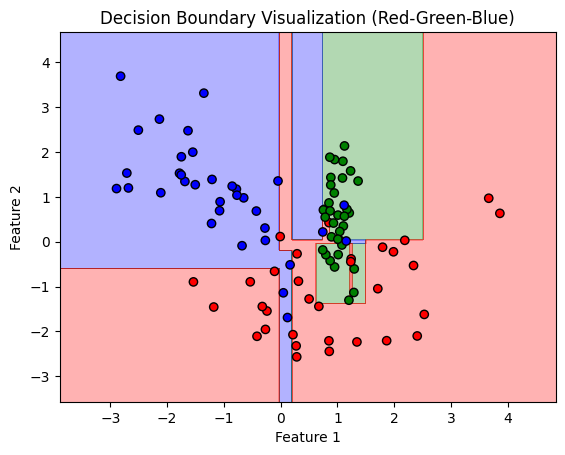

In [ ]:
dt_clf2 = DecisionTreeClassifier(random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf2, X_features, y_labels)

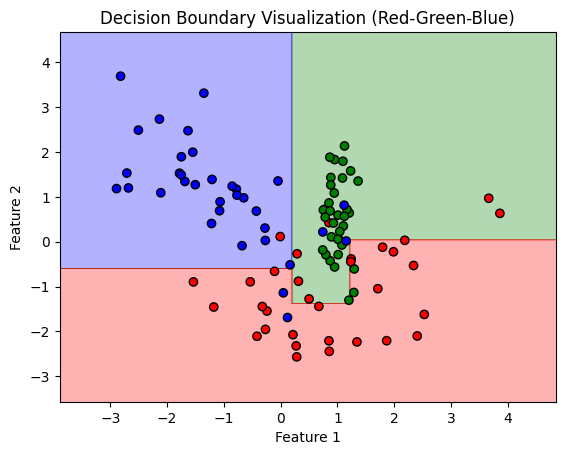

In [ ]:
dt_clf3 = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf3, X_features, y_labels)
# dt_clf2, dt_clf3의 비교
# min_samples_leaf=6으로 생성노드에 제약을 걸었을 때
# 이상치에 반응하지 않고 더 뛰어난 성능을 보여줌

In [121]:
feature_name_df = pd.read_csv('/content/drive/MyDrive/UCI_HAR/features.txt',sep='\s+',
                              header = None,
                              names=['column_index','column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])
feature_name_df


전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [ ]:
# 중복되는 피처명 세기
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                            if x[1] > 0 else x[0], axis = 1)
  new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

In [150]:
def get_human_dataset():

  feature_name_df=pd.read_csv('/content/drive/MyDrive/UCI_HAR/features.txt',sep='\s+',
                              header=None, names=['column_index','column_name'])
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  X_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR/train/X_train.txt',sep='\s+', header=None, names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR/test/X_test.txt',sep='\s+', header=None, names=feature_name)

  y_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR/train/y_train.txt',sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR/test/y_test.txt',sep='\s+', header=None, names=['action'])

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('##학습 피처 데이터셋 info()')
print(X_train.info())

##학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train['action'].value_counts()) # train dataset의 라벨

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [122]:
dt_UCI = DecisionTreeClassifier(random_state=156)
dt_UCI.fit(X_train,y_train) # train set으로 fit 학습
pred = dt_UCI.predict(X_test) # test set으로 predict 예측
accuracy = accuracy_score(y_test,pred)
print('결정트리 예측 정확도: {0:,.4f}'.format(accuracy))

print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_UCI.get_params())


결정트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [ ]:
params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split':[16]
}

grid_cv = GridSearchCV(dt_UCI,param_grid=params,
                       scoring='accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# grid_cv.cv_results_를 데이터프레임으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
# max_depth 파라미터 / test,train dataset 정확도 수치
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [ ]:
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
  dt_UCI2 = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_UCI2.fit(X_train,y_train)
  pred = dt_UCI2.predict(X_test)
  accuracy = accuracy_score(y_test,pred)
  print('max_depth={0}, 정확도: {1:.4f}'.format(depth,accuracy))

max_depth=6, 정확도: 0.8551
max_depth=8, 정확도: 0.8717
max_depth=10, 정확도: 0.8599
max_depth=12, 정확도: 0.8571
max_depth=16, 정확도: 0.8599
max_depth=20, 정확도: 0.8565
max_depth=24, 정확도: 0.8565


In [ ]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24],
}
grid_cv = GridSearchCV(dt_UCI,param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))
print(best_df_clf.get_params())

결정 트리 예측 정확도:0.8717
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


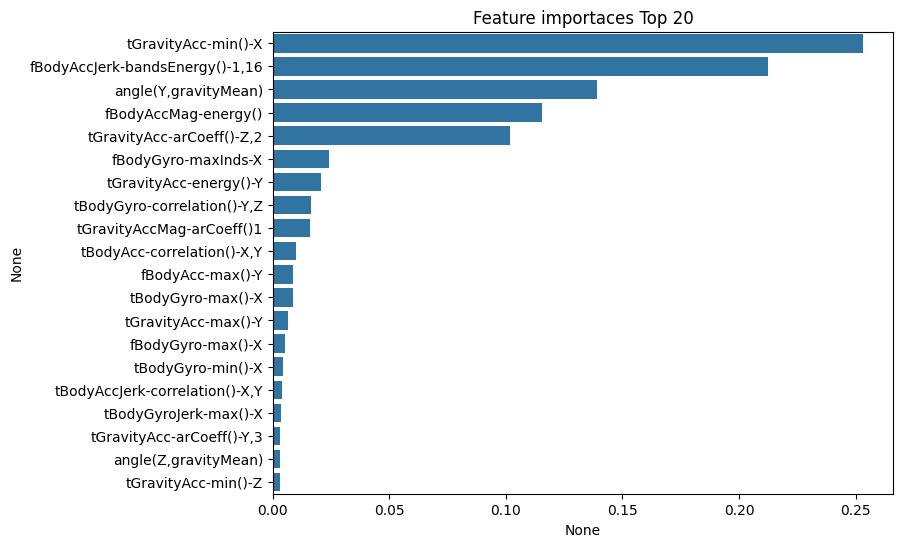

In [106]:
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importaces Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

In [117]:
# 상위 20개 피처 이용해서 의사결정트리 시각화
top_features = ftr_importances.sort_values(ascending=False).index[:20].tolist()

# 상위 20개 feature만 선택해서 새로운 데이터셋 생성
X_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# 새로운 데이터셋으로 결정 트리 모델 학습
best_df_clf2 = DecisionTreeClassifier(random_state=156,max_depth =8, min_samples_split=16)
best_df_clf2.fit(X_selected, y_train)

# export_graphviz 실행 (20개 feature만 사용)
export_graphviz(best_df_clf2, out_file="UCI.dot",
                class_names=["1", "2", "3", "4", "5", "6"],
                feature_names=top_features,  # 모델과 feature 개수 일치
                impurity=True, filled=True)

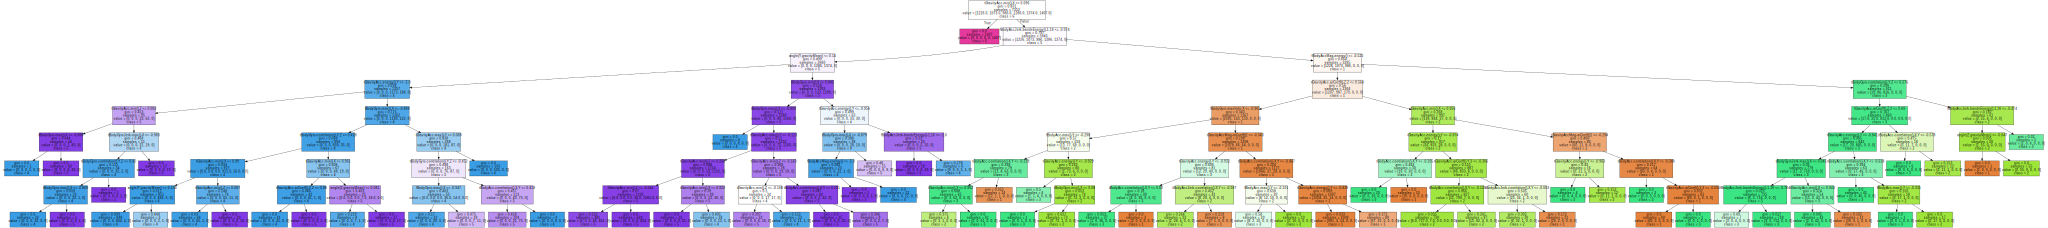

In [116]:
with open("UCI.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

#앙상블 학습

In [124]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [125]:
cancer = load_breast_cancer()

canc_df = pd.DataFrame(cancer.data, columns= cancer.feature_names)
canc_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [129]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,
                                                 test_size=0.2,random_state=156)

vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

Voting 분류기 정확도:0.9561


In [134]:
classifiers = [lr_clf,knn_clf]
for classifier in classifiers:
  classifier.fit(X_train,y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name,accuracy_score(y_test,pred)))

LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


#랜덤 포레스트

In [151]:
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state = 0, max_depth=8)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('랜덤포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤포레스트 정확도 : 0.9220


In [152]:
params = {
    'max_depth':[8,16,24],
    'min_samples_leaf':[1,6,12],
    'min_samples_split':[2,8,16]
}

rf_clf = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
grid_cv= GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도 : 0.9157


In [155]:
rf_clf2 = RandomForestClassifier(n_estimators = 100, min_samples_leaf=6, max_depth=16,
                                 min_samples_split=16, random_state=0)
rf_clf2.fit(X_train,y_train)
pred = rf_clf2.predict(X_test)
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측정확도: 0.9209


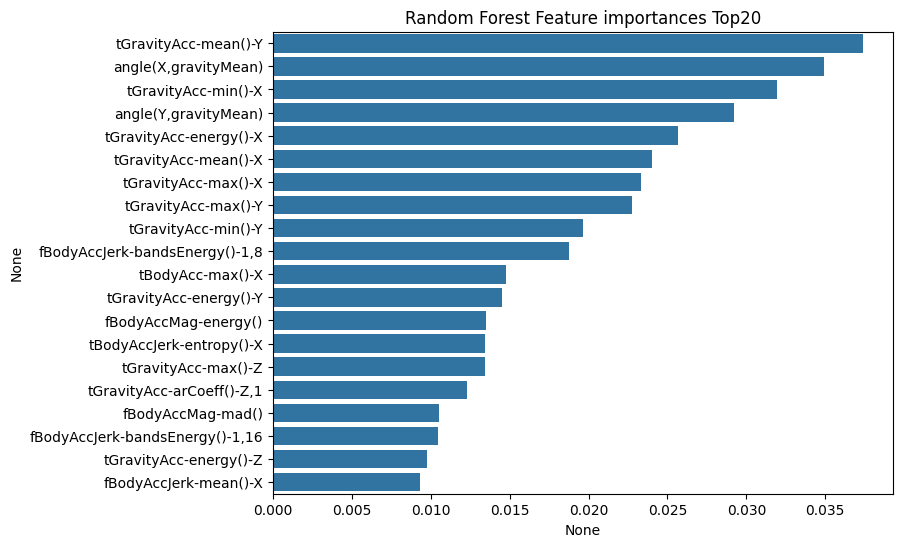

In [154]:
ftr_importances_values = rf_clf2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize = (8,6))
plt.title('Random Forest Feature importances Top20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()